In [1]:
# import necessary libraries and modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
# create dataframe for modeling use
df = pd.read_csv('C:\\Users\\phili\\Documents\\Downloads\\BrazilCapstone\\dup.csv')

In [3]:
# Show important statistics regarding the dataframe, the monetary column will be the column target variable
df.describe()

,Unnamed: 0,Price_x,recency,frequency,monetary
count,10881.000000,10881.000000,10881.000000,10881.000000,10881.000000
mean,40796.437000,101.486170,255.713629,1.735594,230.091791
std,27727.978065,135.662413,152.482434,0.954782,251.347716
min,66.000000,0.850000,0.000000,1.000000,9.000000
25%,16985.000000,39.000000,132.000000,1.000000,99.980000
50%,36999.000000,69.900000,240.000000,2.000000,164.990000
75%,61588.000000,119.900000,370.000000,2.000000,274.980000
max,101269.000000,4799.000000,729.000000,16.000000,7388.000000


In [4]:
# drop unnecessary variables
df = df.drop(['Unnamed: 0','frequency'], axis = 1)

In [5]:
# create dataframe of just repeat customers
df = df[df.duplicated(subset=['Customer ID'], keep = False)]

In [6]:
# susbset dataframe basec off repeat customers first transaction in order to predict repeat business
df = df[df.duplicated(subset=['Customer ID'], keep = 'first')]

In [7]:
# variables that will be used for modeling
df = df[['Price_x', 'recency', 'monetary']]
y = df['monetary'].values
X = df.drop('monetary', axis = 1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
# KMeans model
kmeans = KMeans(n_clusters= 5, init='k-means++', random_state= 123)
kmeans.fit(X_train, y_train)
y_k = kmeans.predict(X_test)
mean_absolute_error(y_k, y_test)

247.2425017088175

In [9]:
# KNeighbors model
regressor = KNeighborsRegressor(n_neighbors = 4)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mean_absolute_error(y_test, y_pred)

107.21414559125087

In [10]:
# Linear Regression model
lr_model = LinearRegression().fit(X, y)
y_lr = lr_model.predict(X_test)
mean_absolute_error(y_test, y_lr)

93.87072297062626

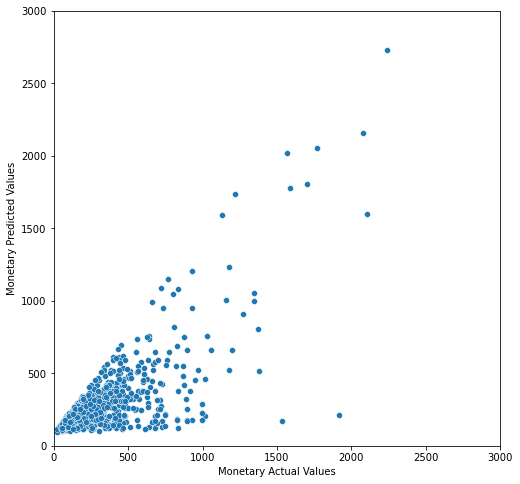

In [11]:
# Scatter plot comparing Actual versus Predicted values
scatter, ax = plt.subplots(figsize = (8,8))
ax = sns.scatterplot(x= y_test, y =y_lr)
ax.set_xlim(left=0, right=3000)
ax.set_ylim(bottom=0, top=3000)
ax.set_xlabel("Monetary Actual Values")
ax.set_ylabel("Monetary Predicted Values")
plt.show()